In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set_style("whitegrid")
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("./Stat.csv", encoding='windows-1251')
df

,Количество больничных дней,Возраст,Пол
0,5,39,Ж
1,4,54,М
2,4,26,М
3,5,42,М
4,4,29,М
...,...,...,...
232,5,30,М
233,4,36,Ж
234,2,60,Ж
235,2,44,Ж


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Количество больничных дней  237 non-null    int64 
 1   Возраст                     237 non-null    int64 
 2   Пол                         237 non-null    object
dtypes: int64(2), object(1)
memory usage: 5.7+ KB


In [5]:
df.describe()

,Количество больничных дней,Возраст
count,237.000000,237.000000
mean,3.257384,40.181435
std,1.807821,6.875157
min,0.000000,23.000000
25%,2.000000,36.000000
50%,3.000000,41.000000
75%,4.000000,45.000000
max,8.000000,60.000000


# Задание
Руководство компании обратило внимание на то, что сотрудники старше 35 лет болеют чаще, чем более молодые сотрудники. Кроме этого, среди мужчин количество пропусков рабочих дней в связи с больничным выше, чем среди женщин. В связи с этой ситуацией, руководство организации планирует ввести дополнительные медицинские осмотры среди групп риска. 
Вам необходимо проверить следующие гипотезы:
1)	Мужчины пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще женщины.
2)	Работники старше 35 лет (age) пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще своих более молодых коллег.


In [6]:
#Создадим целевую фичу
df['Много болничных'] = df['Количество больничных дней'] > 2
df

,Количество больничных дней,Возраст,Пол,Много болничных
0,5,39,Ж,True
1,4,54,М,True
2,4,26,М,True
3,5,42,М,True
4,4,29,М,True
...,...,...,...,...
232,5,30,М,True
233,4,36,Ж,True
234,2,60,Ж,False
235,2,44,Ж,False


# Задание 1
Проверим первую гипотезу "Мужчины пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще женщины"

Средний процент людей с большим количеством болничных 63.71%
Средний процент людей с большим количеством болничных среди мужчин 60.43%
Средний процент людей с большим количеством болничных среди женщин 68.37%


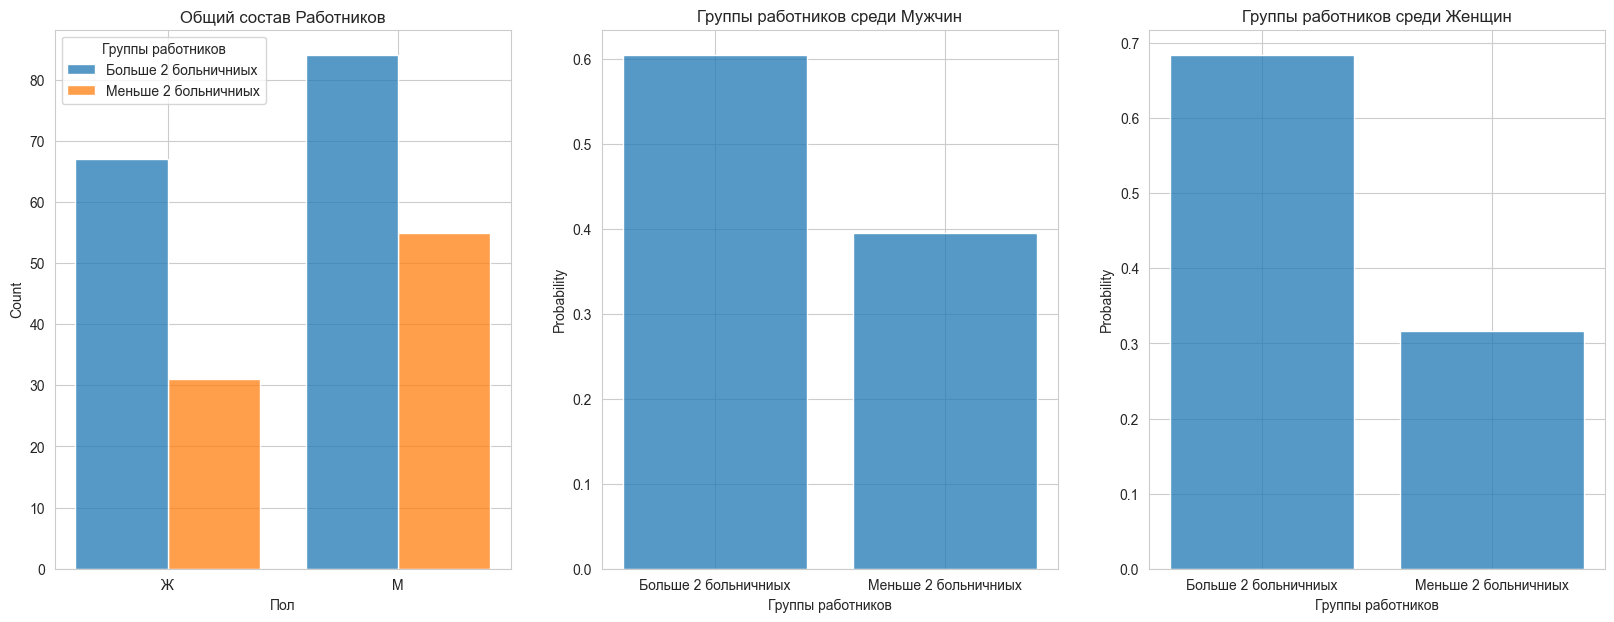

In [7]:
print(f"Средний процент людей с большим количеством болничных {len(df[df['Много болничных']]) / len(df)*100:.2f}%")
print(f"Средний процент людей с большим количеством болничных среди мужчин {len(df[df['Пол'] == 'М'][df['Много болничных']]) / len(df[df['Пол'] == 'М'])*100:.2f}%")
print(f"Средний процент людей с большим количеством болничных среди женщин {len(df[df['Пол'] == 'Ж'][df['Много болничных']]) / len(df[df['Пол'] == 'Ж'])*100:.2f}%")

df['Группы работников'] = df['Много болничных'].replace({True: "Большe 2 больничниых", False: "Меньше 2 больничниых"})
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,7))
ax1.set_title("Общий состав Работников")
sns.histplot(ax=ax1, data=df,  x="Пол", hue='Группы работников', multiple="dodge", stat = "count", shrink=.8)
ax2.set_title("Группы работников среди Мужчин")
sns.histplot(ax=ax2, data=df[df['Пол'] == 'М'],  x="Группы работников", multiple="stack", stat = "probability",  shrink=.8)
ax3.set_title("Группы работников среди Женщин")
sns.histplot(ax=ax3, data=df[df['Пол'] == 'Ж'],  x="Группы работников", multiple="stack", stat = "probability", shrink=.8)

plt.show()

Посчитаем статистическую значимость полученого результата

* Будем считать нулевой гипотезой то что мужчины и женщины пропускают более 2 рабочих дней c равной частотой Pм = Pж
* За алтернативную гипотезу примем что жещины уходят на больничный чаще чем мужчины

In [8]:
from scipy.stats import norm
p = len(df[df['Много болничных']]) / len(df)
n = len(df)

se = np.sqrt(p*(1-p) / n)

pm = len(df[df['Пол'] == 'М'][df['Много болничных']]) / len(df[df['Пол'] == 'М'])
pw = len(df[df['Пол'] == 'Ж'][df['Много болничных']]) / len(df[df['Пол'] == 'Ж'])

z = (pw - pm) / se

p_value = 1 - norm.cdf(z)
alpha = 0.05
print(f"Z-статистика: {z:.4f}")
print(f"P-значение: {p_value:.4f} (Вероятность что на деле частота пропуска более 2 рабочих дней у женщин и мужчин былиже друг к другу чем в полученых данных)")
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: женщины пропускают более 2 рабочих дней значимо чаще, чем мужчины.")
else:
    print("Не хватает доказательств для отклонения нулевой гипотезы.")

Z-статистика: 2.5408
P-значение: 0.0055 (Вероятность что на деле частота пропуска более 2 рабочих дней у женщин и мужчин былиже друг к другу чем в полученых данных)
Отвергаем нулевую гипотезу: женщины пропускают более 2 рабочих дней значимо чаще, чем мужчины.


**Вывод:**

Видно что теория не верна средний процент прогулов среди мужчин и женщин +- равнен. И хотя большая часть прогулов совершается мужчинами доля прогулов серди женщин выше. 

# Задание 2
Проверим вторую гипотезу "Работники старше 35 лет (age) пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще своих более молодых коллег."

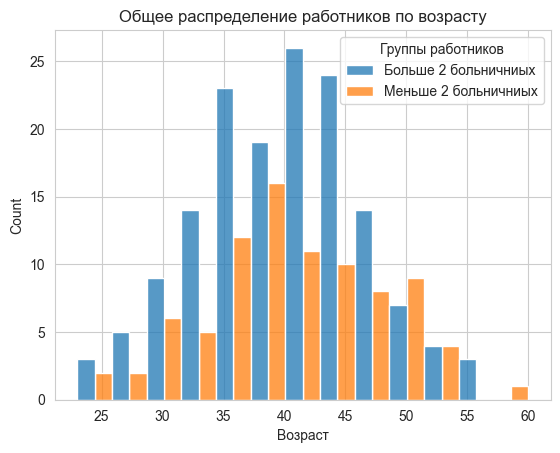

In [9]:
#
plt.title("Общее распределение работников по возрасту")
sns.histplot(df, x='Возраст', hue="Группы работников", multiple="dodge")
plt.show()

Средний процент людей с большим количеством болничных 63.71%
Средний процент людей с большим количеством болничных среди людей старше 35 62.83%
Средний процент людей с большим количеством болничных среди моложе 35 67.39%


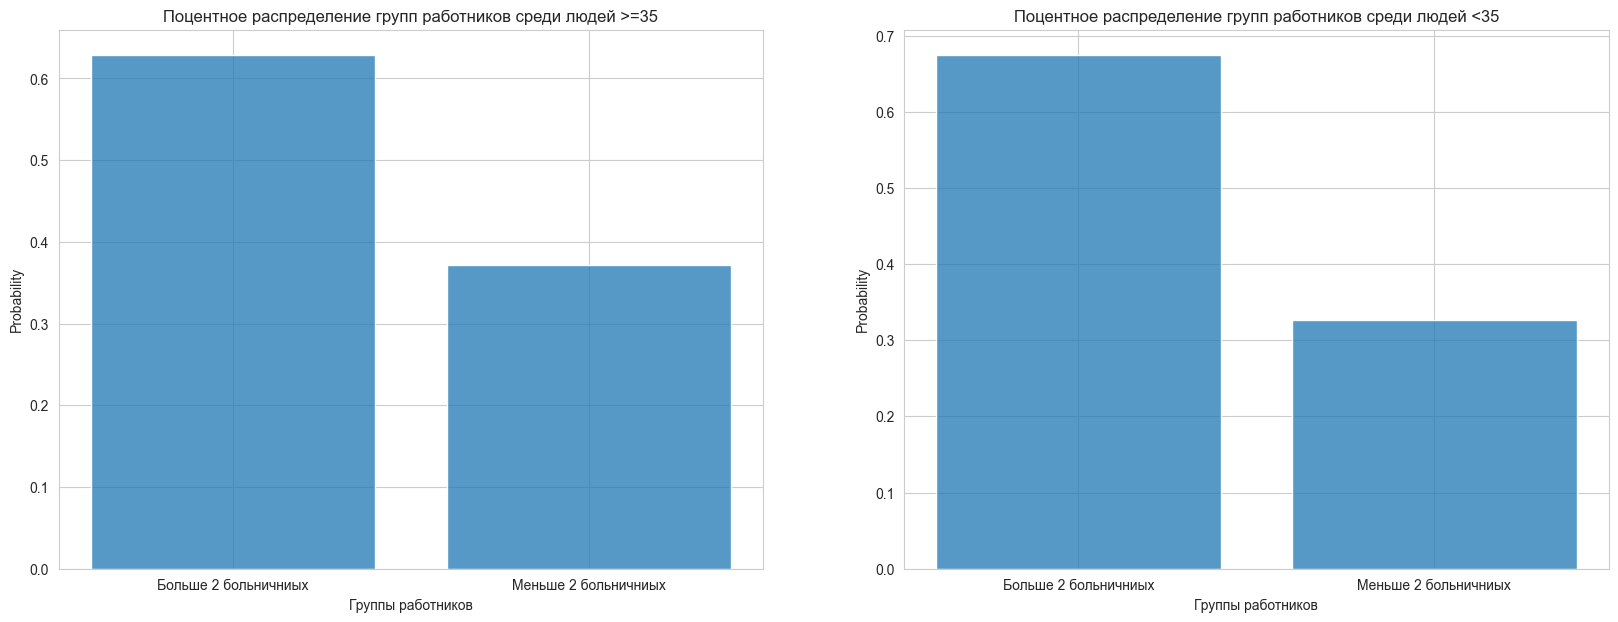

In [10]:
print(f"Средний процент людей с большим количеством болничных {len(df[df['Много болничных']]) / len(df)*100:.2f}%")
print(f"Средний процент людей с большим количеством болничных среди людей старше 35 {len(df[df['Возраст'] >= 35][df['Много болничных']]) / len(df[df['Возраст'] >= 35])*100:.2f}%")
print(f"Средний процент людей с большим количеством болничных среди моложе 35 {len(df[df['Возраст'] < 35][df['Много болничных']]) / len(df[df['Возраст'] < 35])*100:.2f}%")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))
ax1.set_title("Поцентное распределение групп работников среди людей >=35")
sns.histplot(ax=ax1, data=df[df['Возраст'] >= 35],  x="Группы работников", multiple="stack", stat = "probability",  shrink=.8)
ax2.set_title("Поцентное распределение групп работников среди людей <35")
sns.histplot(ax=ax2, data=df[df['Возраст'] < 35],  x="Группы работников", multiple="stack", stat = "probability", shrink=.8)
plt.show()


Посчитаем статистическую значимость полученого результата

* Будем считать нулевой гипотезой то что люди до 35 и люди старше 35 пропускают более 2 рабочих дней c равной частотой P1 = P2
* За алтернативную гипотезу примем что люди моложе 35 уходят на больничный чаще чем люди более старшего возраста

In [11]:
py = len(df[df['Возраст'] < 35][df['Много болничных']]) / len(df[df['Возраст'] < 35])
po = len(df[df['Возраст'] >= 35][df['Много болничных']]) / len(df[df['Возраст'] >= 35])

z = (py - po) / se

p_value = 1 - norm.cdf(z)
alpha = 0.05
print(f"Z-статистика: {z:.4f}")
print(f"P-значение: {p_value:.4f}")
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: люди моложе 35 уходят на больничный чаще чем люди более старшего возраста.")
else:
    print("Не хватает доказательств для отклонения нулевой гипотезы.")

Z-статистика: 1.4613
P-значение: 0.0720
Не хватает доказательств для отклонения нулевой гипотезы.


**Вывод**
Из распределения видно что большое количество пропусков у людей старше 35 обусловлена тем что лишь малая часть работников представляет возрастную группу до 35 лет. Относительная частота пропусков в группе людей меньше 35 выше чем в группе до 35. Но статистической значимости данного наблюдения недостаточно для опровержения гипотезы о том что люди до и после 35 уходят на пенсию с одной частотой